# Training an Agent for Blackjack

In this notebook, we will train an agent using the Q-learning algorithm to play the game of Blackjack. The goal of the agent will be to learn an optimal policy for deciding when to hit or stand based on its current hand and the dealer's visible card.

## Description of the Blackjack Game

Blackjack is a card game where the player competes against the dealer. The objective of the game is to obtain a hand with a score as close to 21 as possible without exceeding it. If the player's score exceeds 21, they automatically lose the game. If the player does not exceed 21, the dealer also plays, and the one with a score closest to 21 without exceeding it wins.

## Learning Algorithm

We will use the Q-learning algorithm to train the agent. Q-learning is a reinforcement learning algorithm that learns an optimal action-value function (Q-value) for each state-action pair, representing the expected reward of taking an action in a given state.

## Training Process

1. **Environment Initialization**: We create an instance of the Blackjack game as the training environment for the agent.

2. **Agent Initialization**: We create an instance of the Q-learning agent and define the training parameters, such as the learning rate, exploration rate, and discount factor.

3. **Agent Training**: We iterate through a predefined number of training episodes, where the agent plays multiple Blackjack games and updates its Q-value function at each step.

4. **Agent Evaluation**: After training, we evaluate the agent's performance by playing multiple test games and recording the win rate.

## Results Visualization

We will use graphs and statistics to visualize the training results, including the evolution of the win rate during training and the outcome of the test episodes.



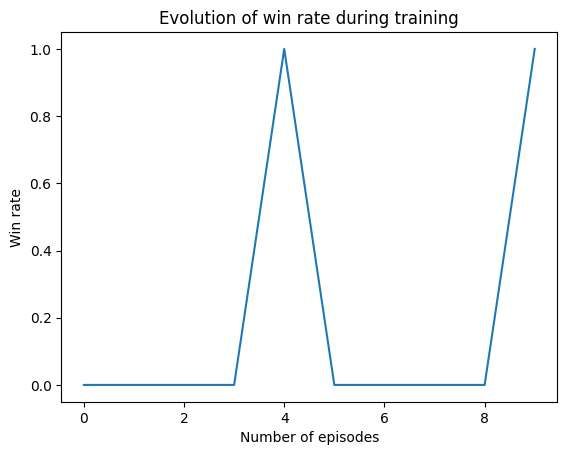

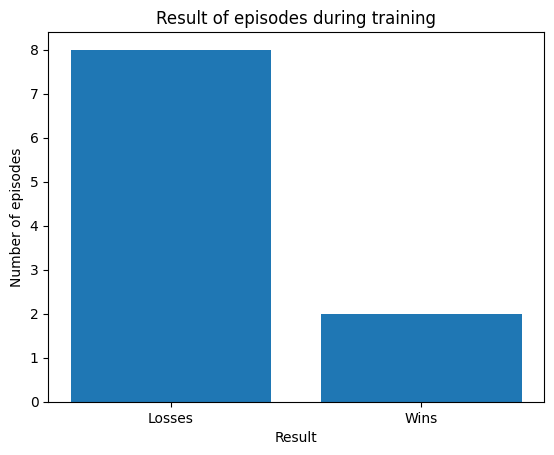

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from blackjack import Blackjack
from agent import QLearningAgent

# Training the agent
env = Blackjack()
agent = QLearningAgent(n_actions=2)
num_episodes = 10
num_test_episodes = 10
win_rates = []
rewards_per_episode = []

# Loop through episodes for training
for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_wins = 0
    while not done:
        action = agent.choose_action(*state)
        next_state, reward, done = env.step(action)
        agent.update_q_table(state, action, reward, next_state)
        state = next_state
        if reward == 1:
            total_wins += 1
    win_rates.append(total_wins)

# Visualization of statistics
plt.plot(win_rates)
plt.xlabel('Number of episodes')
plt.ylabel('Win rate')
plt.title('Evolution of win rate during training')
plt.show()

# Counting number of wins and losses
num_wins = sum(win_rates)
num_losses = num_episodes - num_wins

# Creating a list with the result of each episode (0 for loss, 1 for win)
episode_results = [0] * num_losses + [1] * num_wins

# Visualization of statistics with bar chart
plt.bar(['Losses', 'Wins'], [num_losses, num_wins])
plt.xlabel('Result')
plt.ylabel('Number of episodes')
plt.title('Result of episodes during training')
plt.show()
